In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE,ADASYN

from scipy import stats

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,average_precision_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

In [99]:
df=pd.read_csv("creditcard.csv")

In [85]:
df=df.drop(['Time'],axis=1)

In [86]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [87]:
len(df)

284807

In [88]:
# df.shape

In [89]:
# df.info()

In [90]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [91]:
# df.isnull().sum()

In [92]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [93]:
X=df.drop(['Class'],axis=1)
y=df['Class']

# Train test split

from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)
              precision    recall  f1-score   support

           0       1.00      0.18      0.30     85296
           1       0.00      0.96      0.00       147

    accuracy                           0.18     85443
   macro avg       0.50      0.57      0.15     85443
weighted avg       1.00      0.18      0.30     85443



In [94]:
print('No Frauds are ', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the dataset')

No Frauds are  99.83 % of the dataset
Frauds 0.17 % of the dataset


graph for V1


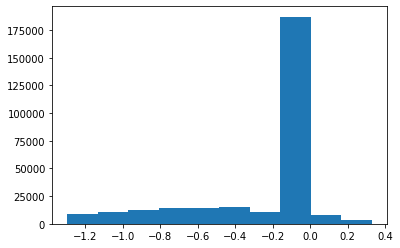

graph for V2


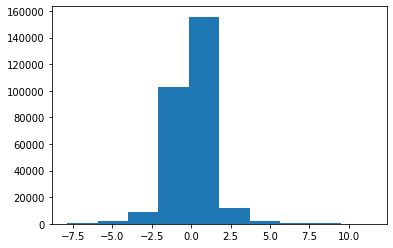

graph for V3


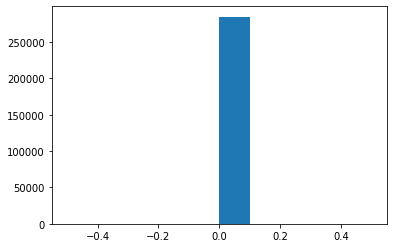

graph for V4


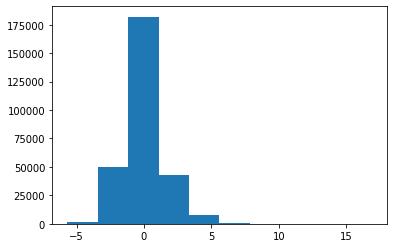

graph for V5


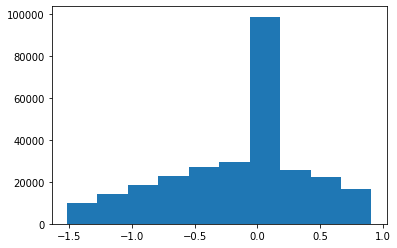

graph for V6


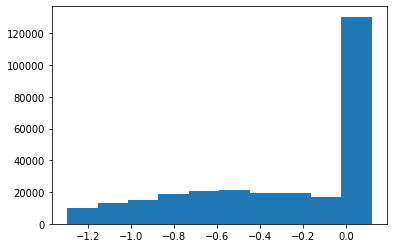

graph for V7


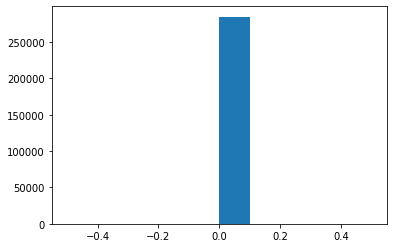

graph for V8


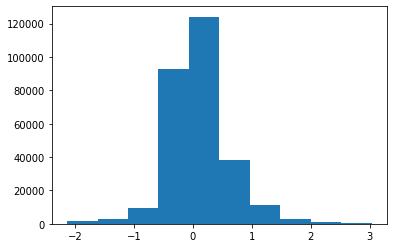

graph for V9


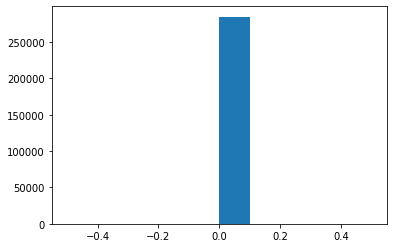

graph for V10


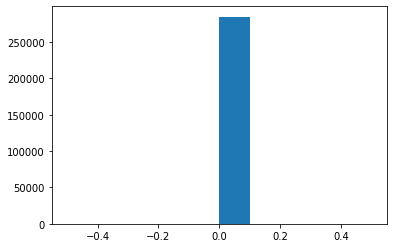

graph for V11


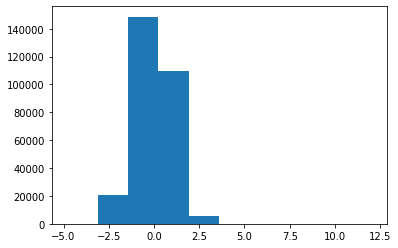

graph for V12


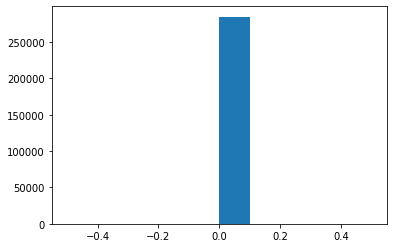

graph for V13


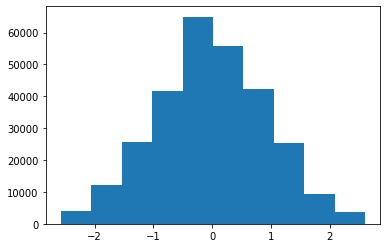

graph for V14


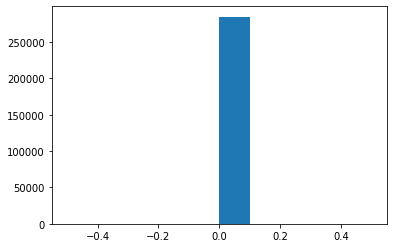

graph for V15


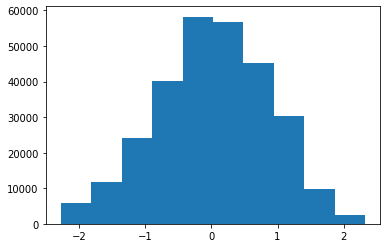

graph for V16


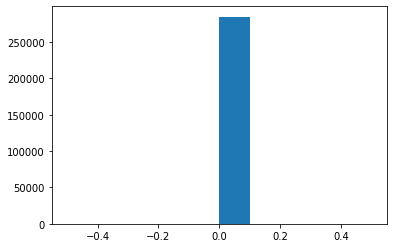

graph for V17


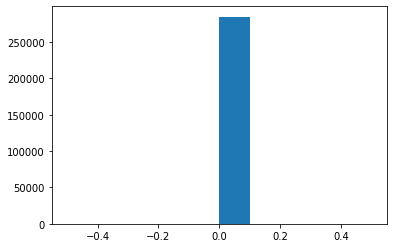

graph for V18


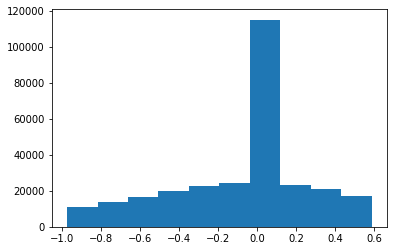

graph for V19


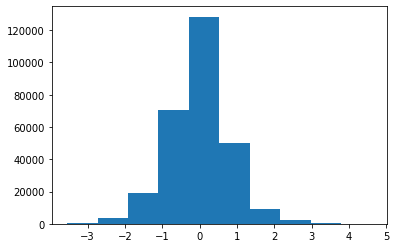

graph for V20


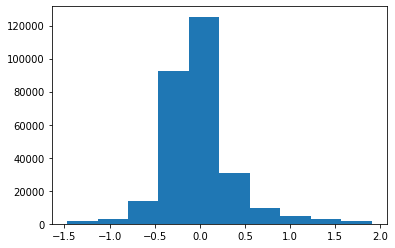

graph for V21


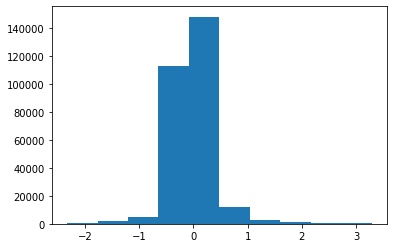

graph for V22


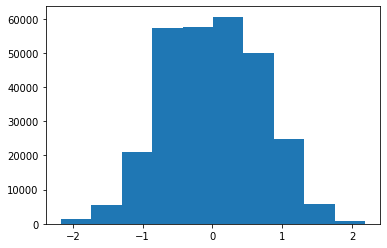

graph for V23


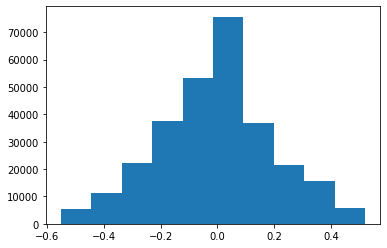

graph for V24


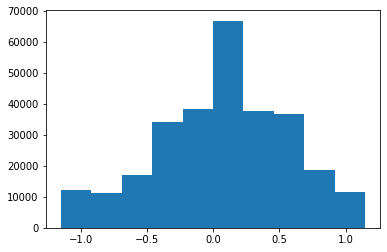

graph for V25


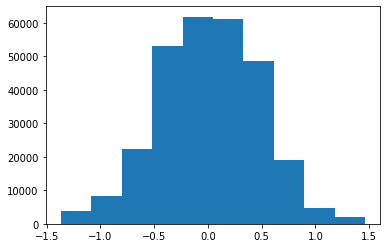

graph for V26


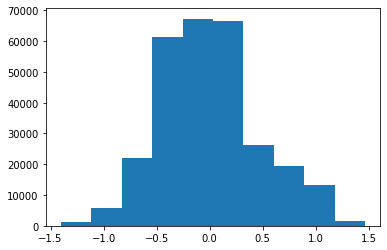

graph for V27


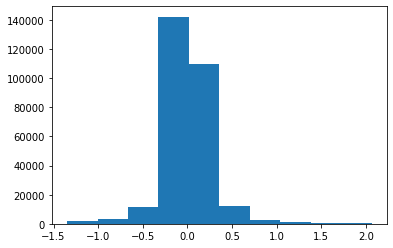

graph for V28


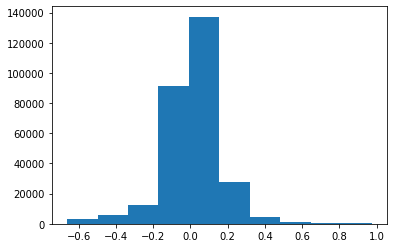

graph for Amount


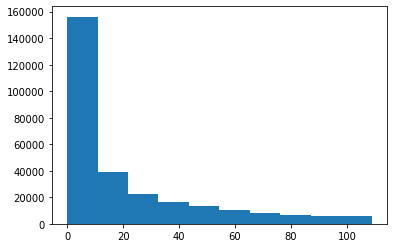

graph for Class


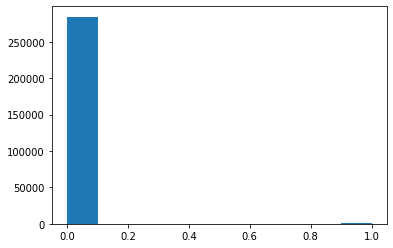

In [98]:
for i in range(0,30):
    print("graph for",df.columns[i])
    plt.hist(df.iloc[:,i])
    plt.show()

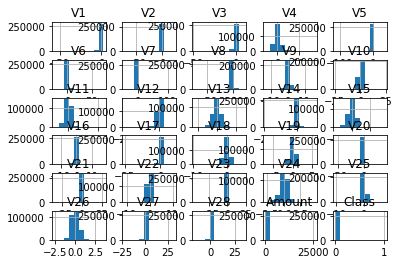

In [14]:
df.hist()
plt.show()

<AxesSubplot:>

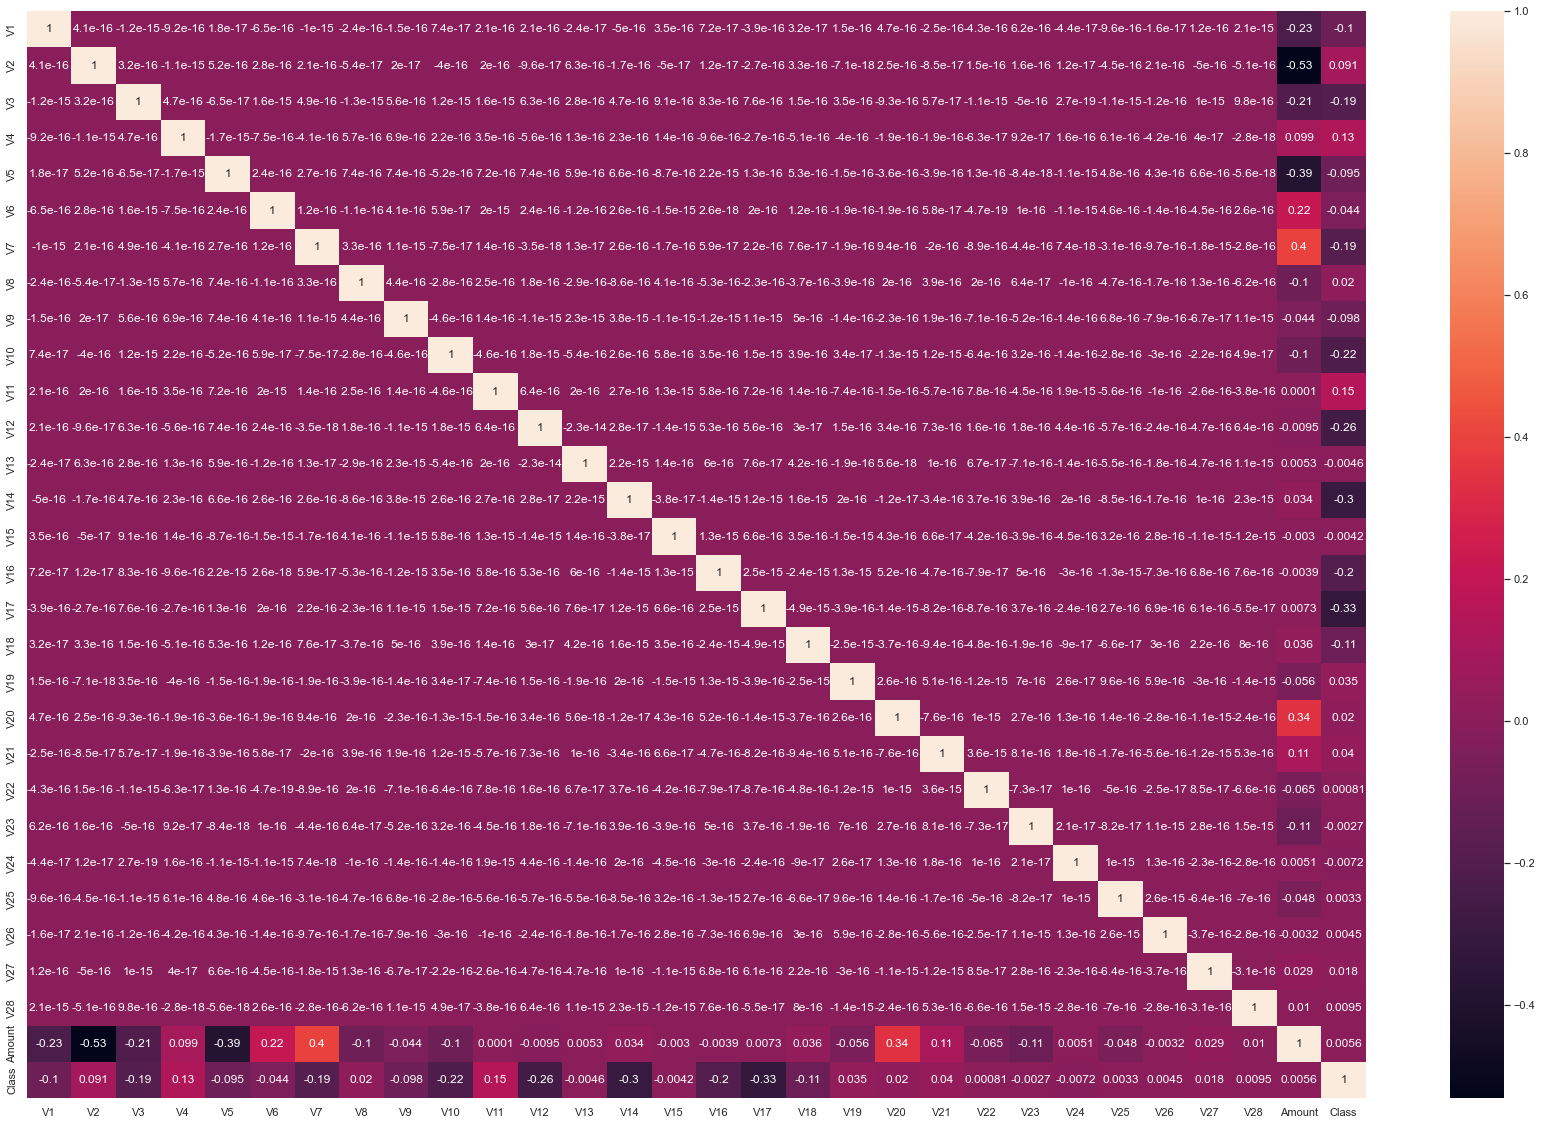

In [15]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(),annot=True)

In [16]:
df.iloc[:,28:30]

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
...,...,...
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0


In [101]:
X=df.drop(['Class'],axis=1)
y=df['Class']

# Train test split

In [102]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


# Models Checking Without balancing of dataset

Without handling imbalanced data

Decision Tree

In [103]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [104]:
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [105]:
# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
#     print("Confusion Matrix: ",
#         confusion_matrix(y_test, y_pred))
      
#     print ("Accuracy : ",
#     accuracy_score(y_test,y_pred)*100)
      
    print(classification_report(y_test, y_pred))
  

In [106]:
clf_gini = train_using_gini(X_train, X_test, y_train)

clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

In [107]:
# print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_gini)*100)
      

Predicted values:
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.71      0.76       147

    accuracy                           1.00     85443
   macro avg       0.91      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy :  99.92392589211521


Logistic Regression

In [108]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print ("Accuracy : ",
    accuracy_score(y_test,predictions)*100)
      

C:\Users\uday2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.70      0.69      0.69       147

    accuracy                           1.00     85443
   macro avg       0.85      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy :  99.89583699074237


In [109]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [110]:
print(classification_report(y_test, rf_pred))
print ("Accuracy : ",
    accuracy_score(y_test,rf_pred)*100)
      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.67      0.78       147

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy :  99.93328885923948


<strong>As the accuracy for majority class is 100% but the recall of minority class is less, it means that it is biased for majority.</strong>

# UnderSampling the Majority data

In [111]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))


Before Undersampling, counts of label '1': 345
Before Undersampling, counts of label '0': 199019 

After Undersampling, the shape of train_X: (690, 30)
After Undersampling, the shape of train_y: (690,) 

After Undersampling, counts of label '1': 345
After Undersampling, counts of label '0': 345


In [112]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [113]:
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [114]:
# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
#     print("Confusion Matrix: ",
#         confusion_matrix(y_test, y_pred))
      
#     print ("Accuracy : ",
#     accuracy_score(y_test,y_pred)*100)
      
    print(classification_report(y_test, y_pred))
  

In [120]:
clf_gini = train_using_gini(X_train_miss, X_test, y_train_miss)

clf_entropy = tarin_using_entropy(X_train_miss, X_test, y_train_miss)

In [121]:
# print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_gini)*100)
      

Predicted values:
[0 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     85296
           1       0.00      0.90      0.01       147

    accuracy                           0.60     85443
   macro avg       0.50      0.75      0.38     85443
weighted avg       1.00      0.60      0.75     85443

Accuracy :  60.39816017696008


Logistic Regression

In [122]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_miss, y_train_miss)

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print ("Accuracy : ",
    accuracy_score(y_test,predictions)*100)
      

C:\Users\uday2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.72      0.84     85296
           1       0.01      0.96      0.01       147

    accuracy                           0.72     85443
   macro avg       0.50      0.84      0.43     85443
weighted avg       1.00      0.72      0.84     85443

Accuracy :  72.35115808199618


In [123]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train_miss, y_train_miss)
rf_pred = rf.predict(X_test)

In [124]:
print(classification_report(y_test, rf_pred))
print ("Accuracy : ",
    accuracy_score(y_test,rf_pred)*100)
      

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     85296
           1       0.01      0.91      0.03       147

    accuracy                           0.89     85443
   macro avg       0.51      0.90      0.48     85443
weighted avg       1.00      0.89      0.94     85443

Accuracy :  88.6286764275599


<strong>Now the recall of minority is increased by undersampling the majority</strong>

# OverSampling the Minority data (SMOTE)

In [135]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [127]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [128]:
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [129]:
# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
#     print("Confusion Matrix: ",
#         confusion_matrix(y_test, y_pred))
      
#     print ("Accuracy : ",
#     accuracy_score(y_test,y_pred)*100)
      
    print(classification_report(y_test, y_pred))
  

In [130]:
clf_gini = train_using_gini(X_train_res, X_test, y_train_res)

clf_entropy = tarin_using_entropy(X_train_res, X_test, y_train_res)

In [131]:
# print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_gini)*100)
      

Predicted values:
[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.10      0.85      0.18       147

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy :  98.63768828341702


Logistic Regression

In [132]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_res, y_train_res)

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print ("Accuracy : ",
    accuracy_score(y_test,predictions)*100)
      

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.85      0.08       147

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy :  96.8025467270578


In [133]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)

In [134]:
print(classification_report(y_test, rf_pred))
print ("Accuracy : ",
    accuracy_score(y_test,rf_pred)*100)
      

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.21      0.86      0.33       147

    accuracy                           0.99     85443
   macro avg       0.60      0.93      0.67     85443
weighted avg       1.00      0.99      1.00     85443

Accuracy :  99.4113034420608


# Adasyn

In [31]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [127]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [128]:
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [129]:
# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
#     print("Confusion Matrix: ",
#         confusion_matrix(y_test, y_pred))
      
#     print ("Accuracy : ",
#     accuracy_score(y_test,y_pred)*100)
      
    print(classification_report(y_test, y_pred))
  

In [130]:
clf_gini = train_using_gini(X_train_res, X_test, y_train_res)

clf_entropy = tarin_using_entropy(X_train_res, X_test, y_train_res)

In [131]:
# print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_gini)*100)
      

Predicted values:
[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.10      0.85      0.18       147

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy :  98.63768828341702


Logistic Regression

In [132]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_res, y_train_res)

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print ("Accuracy : ",
    accuracy_score(y_test,predictions)*100)
      

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.85      0.08       147

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy :  96.8025467270578


In [ ]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_pred))
print ("Accuracy : ",
    accuracy_score(y_test,rf_pred)*100)
      

In [32]:
lr1 = LogisticRegression()
lr1.fit(X_train_adasyn, y_train_adasyn.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.92      0.07       147

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.96      0.98     85443



C:\Users\uday2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
my_array = scaler.fit_transform(df[df.columns[0:29]])

my_array.shape

(284807, 29)

In [37]:
processed_df = pd.DataFrame(my_array, columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', 'Amount'])

s = df['Class'].to_frame()
processed_df.shape
df = pd.concat([processed_df , s] , axis=1)
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


In [40]:
X=df.drop(['Class'],axis=1)
y=df['Class']

# Train test split

from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [41]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))


C:\Users\uday2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.11      0.88      0.20       147

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

